<a href="https://colab.research.google.com/github/leoka90/Chandan-Kumar-Sah/blob/main/Task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.ensemble import RandomForestClassifier


**Importing Dataset**

In [59]:
dataframe=pd.read_csv("/content/heart.csv")
dataframe.head(100)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,45,0,0,138,236,0,0,152,1,0.2,1,0,2,1
96,57,0,0,128,303,0,0,159,0,0.0,2,1,2,1
97,53,1,0,123,282,0,1,95,1,2.0,1,2,3,0
98,65,1,0,110,248,0,0,158,0,0.6,2,2,1,0


**Dataframe types**

In [9]:
dataframe.dtypes

,0
age,int64
sex,int64
cp,int64
trestbps,int64
chol,int64
fbs,int64
restecg,int64
thalach,int64
exang,int64
oldpeak,float64


In [10]:
dataframe.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


**correlation and heatmap**

In [11]:
dataframe.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


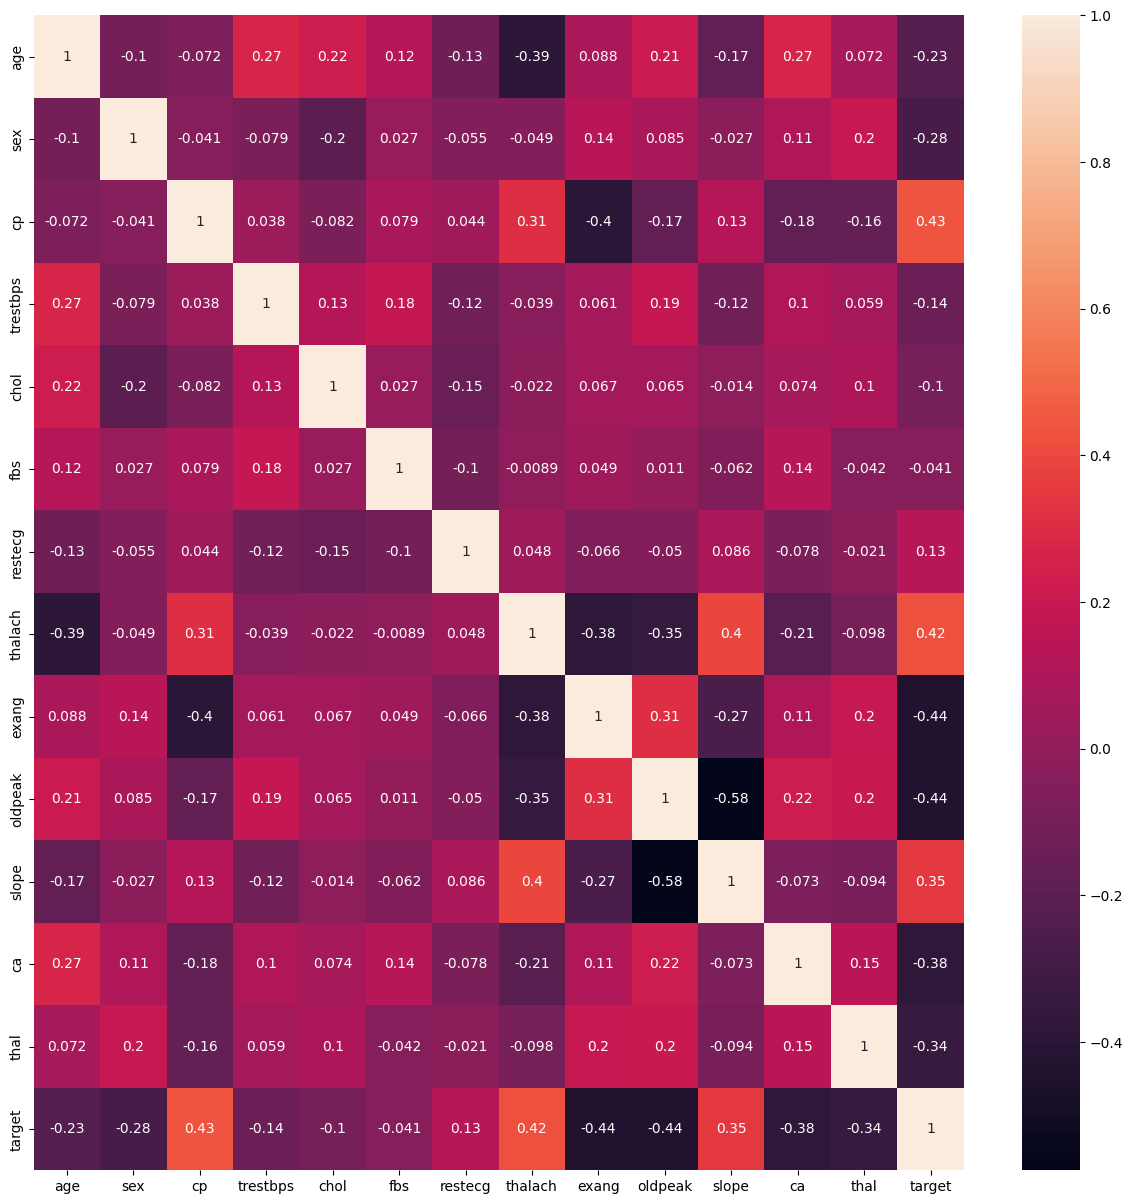

In [12]:
plt.figure(figsize=(15,15))
ax=sns.heatmap(dataframe.corr(),annot=True)
plt.show()

**summary statistics**

In [14]:
dataframe.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**Data Imputation**

In [18]:
dataframe["oldpeak"] = dataframe["oldpeak"].replace(0, dataframe["oldpeak"].median())
dataframe["ca"] = dataframe["ca"].replace(0, dataframe["ca"].mode()[0])
dataframe["thal"] = dataframe["thal"].replace(0, dataframe["thal"].mode()[0])
dataframe["slope"] = dataframe["slope"].replace(0, dataframe["slope"].mode()[0])


**Dependent and independent variables**

In [20]:
X = dataframe.drop(columns="target", axis=1)
y = dataframe["target"]
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,1,0,3
2,70,1,0,145,174,0,1,125,1,2.6,1,0,3
3,61,1,0,148,203,0,1,161,0,0.8,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.8,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.8,2,0,2


In [21]:
y

,target
0,0
1,0
2,0
3,0
4,0
...,...
1020,1
1021,0
1022,0
1023,1


**Train_test split**

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

**Smoote technique**

In [57]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("\nResampled class distribution:")
print(pd.Series(y_train_resampled).value_counts())


Resampled class distribution:
target
1    358
0    358
Name: count, dtype: int64


**Decision_tree**

In [30]:
Decision_Tree=DecisionTreeClassifier()
Decision_Tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [29]:
y_predictions_DT = Decision_Tree.predict(X_test)
print(y_predictions_DT)

[1 1 0 1 0 1 0 0 1 0 1 0 1 1 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 0 0 1 0 1 1 1 1
 1 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 0 1 0 0 1 0 0 1 0 0 0 1
 1 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0 1 0 1 0 1 0
 1 1 0 1 1 0 1 0 0 1 1 0 0 1 0 1 0 0 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1
 0 0 0 0 1 1 0 0 0 1 0 0 1 1 0 0 1 1 0 0 1 1 0 1 1 0 1 1 1 0 0 1 1 0 1 0 1
 0 1 0 1 1 1 0 0 0 0 1 0 0 1 1 1 1 1 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 1 0 1 0
 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 1 0
 1 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 0 0 1
 1 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1
 1 0 0 1 1 1]


**Visualization tree**

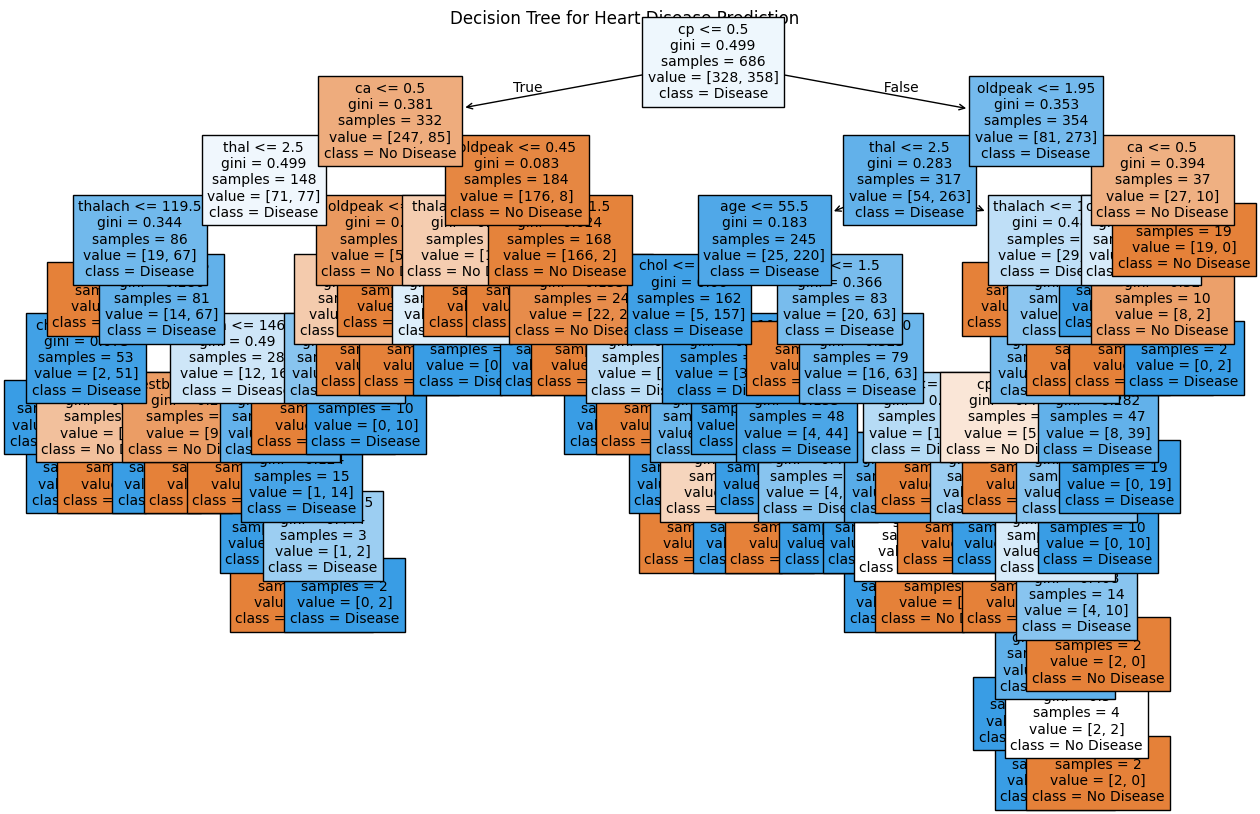

In [32]:
plt.figure(figsize=(15, 10))
plot_tree(
    Decision_Tree,
    feature_names=X.columns,
    class_names=["No Disease", "Disease"],
    filled=True,
    fontsize=10
)
plt.title("Decision Tree for Heart Disease Prediction")
plt.show()

**Confusion matrix and accuracy**

In [35]:
print("confusion_matrix")
print(confusion_matrix(y_test,y_predictions_DT))

confusion_matrix
[[171   0]
 [  3 165]]


In [36]:
accuracy_score(y_test,y_predictions_DT)

0.9911504424778761

**analyze overfitting and control tree depth**

In [38]:
train_acc = accuracy_score(y_test, y_predictions_DT)
test_acc = accuracy_score(y_test, y_predictions_DT)

In [39]:
print("Training Accuracy:", train_acc)
print("Testing Accuracy:", test_acc)

Training Accuracy: 0.9911504424778761
Testing Accuracy: 0.9911504424778761


In [40]:
print(X_train.shape, X_test.shape)


(686, 13) (339, 13)


In [41]:
from sklearn.utils import shuffle
X_shuffled, y_shuffled = shuffle(X, y, random_state=42)


In [43]:
tree_pruned = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_pruned.fit(X_train, y_train)

train_acc = accuracy_score(y_train, tree_pruned.predict(X_train))
test_acc = accuracy_score(y_test, tree_pruned.predict(X_test))

print("Pruned Training Accuracy:", train_acc)
print("Pruned Testing Accuracy:", test_acc)


Pruned Training Accuracy: 0.8556851311953353
Pruned Testing Accuracy: 0.8141592920353983


**Random forest and comparison of accuracy**

In [54]:
from sklearn.model_selection import cross_val_score
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [45]:
rf_train_pred = rf_model.predict(X_train)
rf_test_pred = rf_model.predict(X_test)

In [46]:
rf_train_acc = accuracy_score(y_train, rf_train_pred)
rf_test_acc = accuracy_score(y_test, rf_test_pred)

In [47]:
print("Random Forest Training Accuracy:", rf_train_acc)
print("Random Forest Testing Accuracy:", rf_test_acc)

Random Forest Training Accuracy: 1.0
Random Forest Testing Accuracy: 0.9911504424778761


**Feature Importance**

In [53]:
importances = rf_model.feature_importances_
feature_names = X.columns
feat_importance_df = pd.DataFrame({'Feature': feature_names,'Importance': importances}).sort_values(by='Importance', ascending=False)


In [49]:
print(feat_importance_df)

     Feature  Importance
2         cp    0.126406
9    oldpeak    0.121425
12      thal    0.118981
11        ca    0.118556
7    thalach    0.118424
0        age    0.089485
4       chol    0.086464
3   trestbps    0.075900
8      exang    0.041633
10     slope    0.041298
1        sex    0.031714
6    restecg    0.020390
5        fbs    0.009322


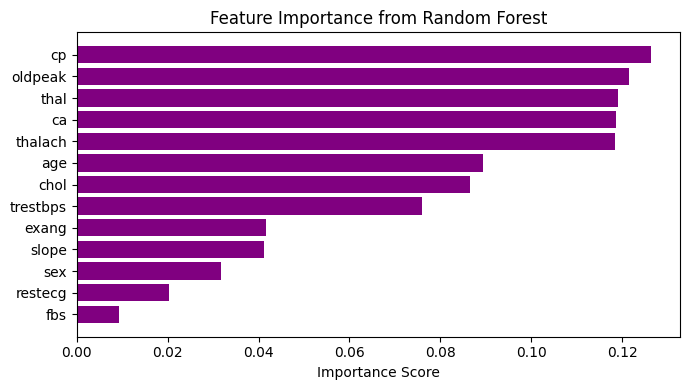

In [52]:
plt.figure(figsize=(7, 4))
plt.barh(feat_importance_df['Feature'], feat_importance_df['Importance'], color='purple')
plt.xlabel('Importance Score')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()  # highest at the top
plt.tight_layout()
plt.show()

**Evaluation using Cross_validation**

In [55]:
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')

In [56]:
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy: {:.4f}".format(np.mean(cv_scores)))
print("Standard Deviation: {:.4f}".format(np.std(cv_scores)))

Cross-Validation Accuracy Scores: [1.         1.         1.         1.         0.98536585]
Mean CV Accuracy: 0.9971
Standard Deviation: 0.0059
